21136


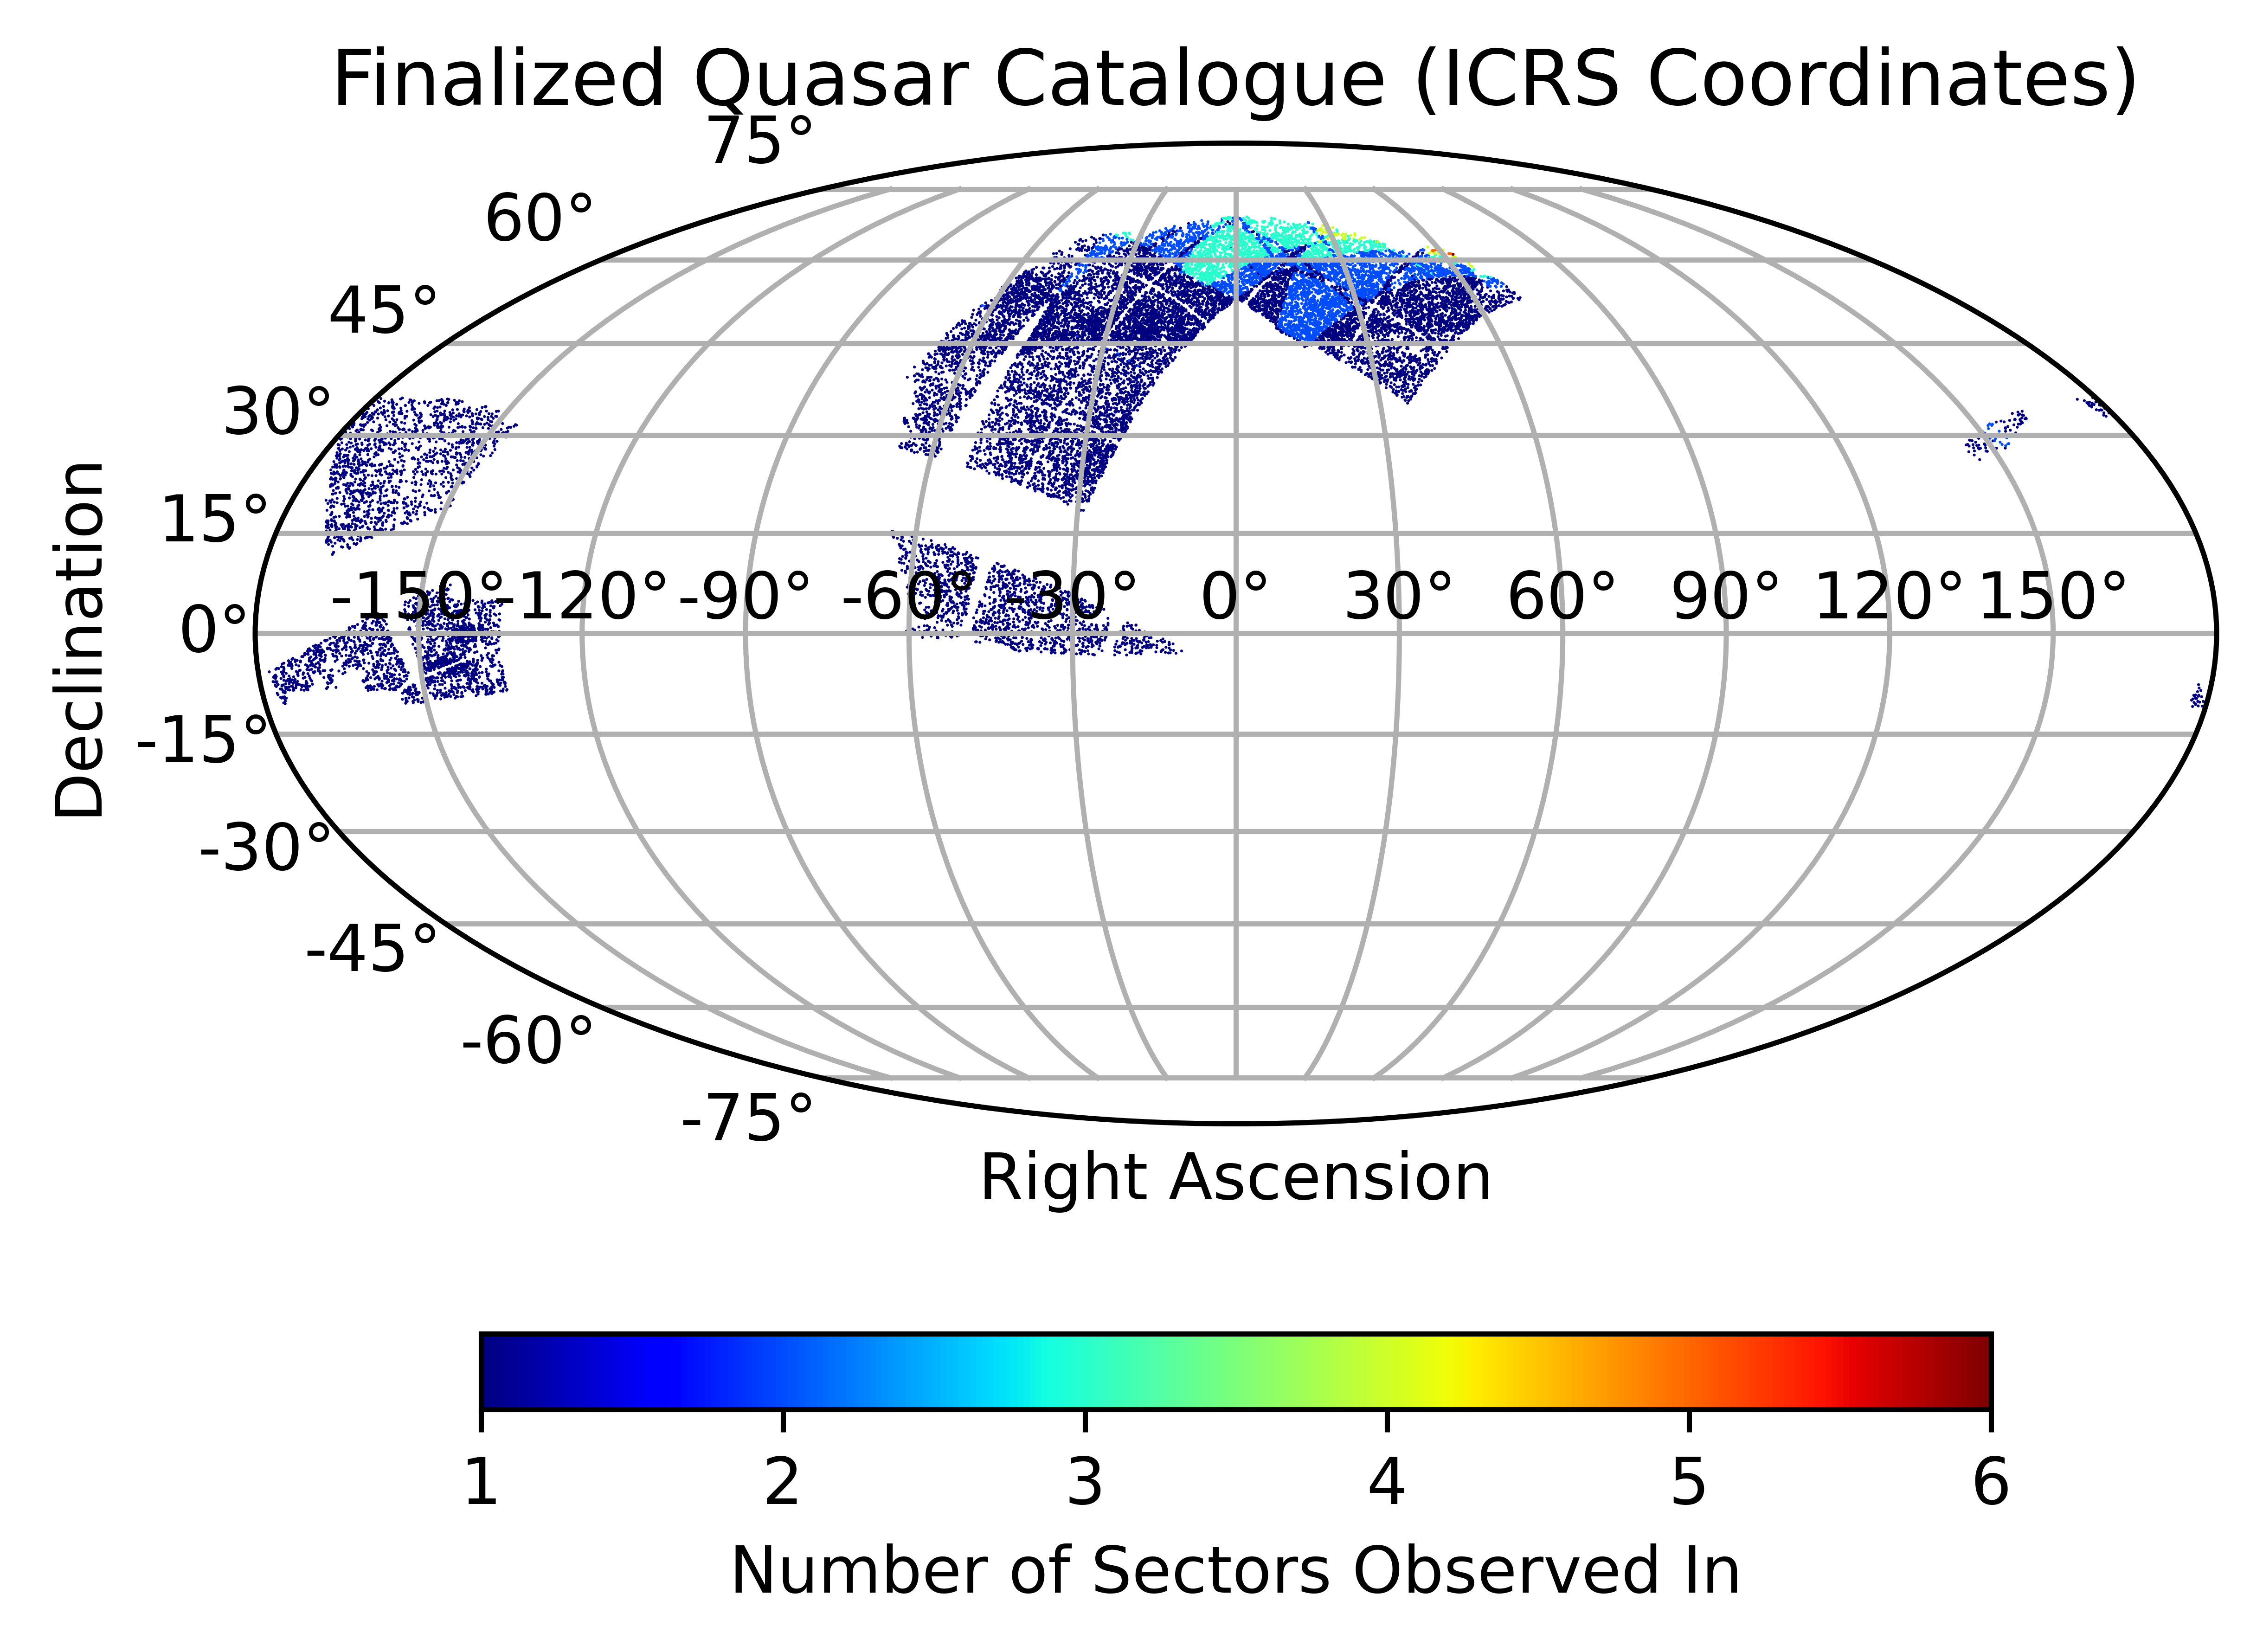

In [16]:
import numpy as np
from astropy.io import fits
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.cm as cm
import astropy.coordinates as ac

catalogue_path = 'E:/catalogues/'

class SkyChart:
    '''
    Docs
    '''
    def __init__(self, ra, dec, cdata=None, file='all_observed.csv'):
        # get ra and dec arrays of points
        dec = pd.read_csv(file, sep=',', usecols=[dec], header=0, squeeze=True).to_numpy()
        ra = pd.read_csv(file, sep=',', usecols=[ra], header=0, squeeze=True).to_numpy()
        self.color_var = pd.read_csv(file, sep=',', usecols=[cdata], squeeze=True).to_numpy()
        self.coordinates = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame=ac.ICRS)
        
    def plot_no_color(self,frame='galactic',projection='mollweide',marker='*',s=0.001,dpi=1000,color='black',
                   title='Positions of objects in the catalogue'):
        if frame == 'galactic':
            #self.coordinates = self.coordinates.transform_to('fk5')
            self.coordinates = self.coordinates.transform_to('galactic')
            self.ra = np.radians(self.coordinates.l.degree)
            self.dec = np.radians(self.coordinates.b.degree)
        else:
            self.ra = np.radians(self.coordinates.ra.degree)
            self.dec = np.radians(self.coordinates.dec.degree)

        fig = plt.figure(dpi=dpi)
        ax = fig.add_subplot(111, projection=projection)
        ax.scatter(ra - (np.pi),dec,s=size,marker='*', c=color)
        ax.grid(True)
        ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
        plt.xlabel('RA')
        plt.ylabel(r'$\delta$')
        plt.title(title)
        plt.show()
        
    def plot_color(self,frame='galactic',projection='mollweide',cmap='viridis',
                   crange=None,marker='*',size=0.001,dpi=1000,
                   title='Positions of objects in the catalogue',cbar_label='Color values'):
        
        self.frame = frame
        self.coordinates = self.coordinates.transform_to(frame)
        if frame == 'galactic' or frame == ac.Galactic:
            ra = np.radians(self.coordinates.l.degree)
            dec = np.radians(self.coordinates.b.degree)
        else:
            ra = np.radians(self.coordinates.ra.degree)
            dec = np.radians(self.coordinates.dec.degree)
            
        var_cmap = self.color_var
        cmap = matplotlib.cm.get_cmap(cmap)
        if crange is not None:
            norm = matplotlib.colors.Normalize(vmin=crange[0], vmax=crange[1])
        if crange is None:
            norm = matplotlib.colors.Normalize(vmin=min(var_cmap), vmax=max(var_cmap))    
        colors = [cmap(norm(value)) for value in var_cmap]

        fig = plt.figure(dpi=dpi)
        ax = fig.add_subplot(111, projection=projection)
        ax.scatter(ra - (np.pi),dec,s=size,c=colors,linewidth=0.0)
        ax.grid(True)
        #ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
        plt.xlabel('Right Ascension')
        plt.ylabel('Declination')
        plt.title(title)
        cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='horizontal', shrink = 0.7)
        cbar.ax.set_xlabel(cbar_label)
        print(len(self.coordinates))#plt.savefig('fig.png')
        plt.show()
    
    def add_point(self,ra,dec,s=0.001,marker='*',color='r'):
        if frame == 'galactic':
            coordinates = coordinates.transform_to('fk5')
            coordinates = coordinates.transform_to('galactic')
            ra = np.radians(coordinates.l)
            dec = np.radians(coordinates.b)
        else:
            ra = np.radians(coordinates.ra.degree)
            dec = np.radians(coordinates.dec.degree)
        ax.scatter(ra-np.pi,dec,s=s,marker='*',linewidth=0.0,c=color)
        plt.show()

    def save_figure(self,filename='figure.png'):
        plt.savefig(filename)
        print("Saved to " + filename)
        
figure = SkyChart('RA','DEC',cdata='SECTORS',file=catalogue_path + 'final_quasar_catalogue.csv')
figure.plot_color(frame='icrs',projection='mollweide',cmap='jet',size=0.2,dpi=1000,title='Finalized Quasar Catalogue (ICRS Coordinates)',cbar_label='Number of Sectors Observed In')
#figure.save_figure(filename='thing.png')

19.43041418532376


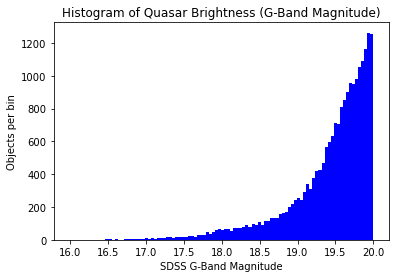

In [12]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(catalogue_path + 'final_quasar_catalogue.csv', sep=',', usecols=['GMAG'], header=0, squeeze=True)
# matplotlib histogram
plt.hist(data, color = 'blue',bins = 100)

# Add labels
plt.title('Histogram of Quasar Brightness (G-Band Magnitude)')
plt.xlabel('SDSS G-Band Magnitude')
plt.ylabel('Objects per bin')
plt.savefig('mag_hist.png',dpi=1000)
print(np.mean(data))